In [1]:
print("radhe radhe")

radhe radhe


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

# IMPORT DATASET PATH
DATASET_PATH= os.getenv("DATASET_PATH")

In [3]:
import pandas as pd
# LOAD DATASET
df=pd.read_csv(DATASET_PATH,index_col="Date",parse_dates=["Date"],dayfirst=False)
df



,Bankura_temp,Birbhum_temp,Burdwan_temp,Darjeeling_temp,Hooghly_temp,Howrah_temp,Jalpaiguri_temp,Kochbihar_temp,Kolkata_temp,Malda_temp,Medinipur_temp,Murshidabad_temp,Nadia_temp,North-24-Parganas_temp,North-Dinajpur_temp,Purulia_temp,South-24-Parganas_temp,South-Dinajpur_temp
Date,,,,,,,,,,,,,,,,,,
1901-01-01,17.970,17.405,18.108,14.058,18.897,19.161,15.593,15.917,19.106,15.670,18.889,17.540,18.428,18.522,15.151,17.159,15.968,16.580
1901-02-01,21.334,21.435,21.879,16.913,22.437,22.497,18.650,19.243,22.600,19.754,21.892,21.501,22.215,21.830,18.845,20.297,18.558,20.409
1901-03-01,26.523,26.422,26.913,21.394,27.463,27.343,23.034,23.535,27.495,24.729,26.686,26.360,26.938,26.097,23.732,25.467,22.129,25.228
1901-04-01,31.712,31.807,31.968,25.806,31.886,31.445,27.258,27.823,31.686,30.027,30.972,31.581,31.725,29.794,28.800,30.974,25.039,30.325
1901-05-01,32.202,31.714,31.934,26.155,31.622,31.316,27.323,27.809,31.392,29.840,31.223,31.243,31.368,29.616,28.859,32.114,25.069,29.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,28.106,28.499,28.547,27.061,28.633,28.567,28.438,29.013,28.697,28.286,27.852,28.819,28.898,27.609,28.474,27.416,23.336,29.026
2002-09-01,28.072,28.519,28.568,26.502,28.653,28.603,27.949,28.511,28.700,28.224,27.888,28.916,29.102,27.743,28.198,27.325,23.492,29.013
2002-10-01,26.541,27.130,27.294,25.052,27.605,27.644,26.433,26.938,27.800,26.828,26.773,27.597,27.991,26.991,26.759,25.715,22.852,27.534


In [4]:
import pandas as pd

class TemperatureDataTransformer:
    def __init__(self, data):
        """
        Initialize the class with the wide-format data.
        """
        self.df_wide = pd.DataFrame(data)

    def wide_to_long(self):
        """
        Transform the wide-format data into long format.
        """
        df_long = self.df_wide.melt(id_vars=['Year'], var_name='Month', value_name='Temperature')
        df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'] + '-01')
        df_long = df_long.set_index('Date')[['Temperature']]
        df_long=df_long.sort_index()
        return df_long

    def long_to_wide(self, df_long):
        """
        Transform the long-format data back into wide format.
        """
        df_long = df_long.reset_index()
        df_long['Year'] = df_long['Date'].dt.year
        df_long['Month'] = df_long['Date'].dt.month_name().str[:3]
        df_wide = df_long.pivot(index='Year', columns='Month', values='Temperature')
        # Reorder columns to match the original format
        month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        df_wide = df_wide[month_order]
        return df_wide.reset_index()


In [ ]:
# convert=TemperatureDataTransformer(df)
# df_long=convert.wide_to_long()
# df_long
# # convert.long_to_wide(df_long=df_long)

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Year']"

In [6]:

import datetime
from dateutil.relativedelta import relativedelta  # Import relativedelta

df_long=df
# Define the train end date
train_end_date = datetime.datetime(1992, 12, 1)

# Calculate the test start date by adding 1 month
test_start = train_end_date + relativedelta(months=1)

train_data=df_long[:train_end_date]
test_data=df_long[test_start:]

### data prepration for Lstm model


In [9]:

# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def split_sequence(sequence,n_step):
    X, y = [],[]
    for i in range(len(sequence)):
        end_ix = i + n_step
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



n_steps=12
X_train,y_train=split_sequence(train_data["Temperature"],n_step=n_steps)
X_test,y_test=split_sequence(test_data["Temperature"],n_step=n_steps)

    
n_features=1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],n_features)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],n_features)


model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=1)

# x_input = array([[60, 70, 80]])
# x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(X_test, verbose=2)
# print(yhat)
# print(x_input.shape)

KeyError: 'Temperature'

In [8]:

# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def split_sequence(sequence,n_step):
    X, y = [],[]
    for i in range(len(sequence)):
        end_ix = i + n_step
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
    

In [16]:
n_steps=12
X_train,y_train=split_sequence(train_data["Temperature"],n_step=n_steps)
X_test,y_test=split_sequence(test_data["Temperature"],n_step=n_steps)


KeyError: 'Temperature'

In [11]:
X_train,y_train

(array([[17.97 , 21.334, 26.523, ..., 27.048, 21.739, 18.1  ],
        [21.334, 26.523, 31.712, ..., 21.739, 18.1  , 19.304],
        [26.523, 31.712, 32.202, ..., 18.1  , 19.304, 21.54 ],
        ...,
        [26.168, 21.495, 18.254, ..., 28.957, 28.487, 28.348],
        [21.495, 18.254, 18.391, ..., 28.487, 28.348, 26.711],
        [18.254, 18.391, 20.664, ..., 28.348, 26.711, 22.877]]),
 array([19.304, 21.54 , 28.05 , ..., 26.711, 22.877, 18.757]))

In [12]:
X_test,y_test

(array([[19.656, 22.851, 26.131, ..., 26.638, 22.083, 19.026],
        [22.851, 26.131, 29.796, ..., 22.083, 19.026, 19.885],
        [26.131, 29.796, 31.958, ..., 19.026, 19.885, 21.347],
        ...,
        [27.648, 24.193, 19.848, ..., 29.2  , 28.106, 28.072],
        [24.193, 19.848, 19.528, ..., 28.106, 28.072, 26.541],
        [19.848, 19.528, 22.792, ..., 28.072, 26.541, 22.598]]),
 array([19.885, 21.347, 27.47 , 29.959, 32.763, 30.565, 28.314, 28.07 ,
        28.159, 26.8  , 22.579, 19.104, 18.021, 21.533, 26.554, 31.294,
        32.306, 31.656, 28.385, 28.509, 28.031, 26.538, 22.576, 19.429,
        19.715, 21.205, 27.954, 29.957, 33.317, 29.831, 28.924, 27.716,
        28.831, 26.204, 22.495, 18.647, 18.424, 20.906, 27.213, 28.731,
        32.165, 31.968, 28.273, 28.127, 27.754, 26.655, 23.544, 19.249,
        18.07 , 21.952, 24.778, 30.213, 32.182, 32.721, 28.536, 28.731,
        28.45 , 27.945, 23.374, 19.761, 18.755, 22.955, 27.97 , 32.615,
        31.95 , 30.624, 28.197,

In [13]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((1092, 12), (1092,), (108, 12), (108,))

In [14]:
n_features=1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],n_features)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],n_features)

In [15]:
X_train.shape,X_test.shape

((1092, 12, 1), (108, 12, 1))

In [28]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
35/35 [==============================] - 3s 11ms/step - loss: 95.1880
Epoch 2/100
35/35 [==============================] - 0s 11ms/step - loss: 12.3276
Epoch 3/100
35/35 [==============================] - 0s 13ms/step - loss: 5.4960
Epoch 4/100
35/35 [==============================] - 0s 13ms/step - loss: 3.0533
Epoch 5/100
35/35 [==============================] - 0s 14ms/step - loss: 1.6641
Epoch 6/100
35/35 [==============================] - 0s 11ms/step - loss: 1.3536
Epoch 7/100
35/35 [==============================] - 0s 11ms/step - loss: 1.2063
Epoch 8/100
35/35 [==============================] - 0s 11ms/step - loss: 1.0586
Epoch 9/100
35/35 [==============================] - 0s 11ms/step - loss: 1.0289
Epoch 10/100
35/35 [==============================] - 0s 13ms/step - loss: 0.9489
Epoch 11/100
35/35 [==============================] - 1s 15ms/step - loss: 0.9444
Epoch 12/100
35/35 [==============================] - 0s 13ms/step - loss: 0.9448
Epoch 13/100
35/35 [===

In [31]:
# x_input = array([[60, 70, 80]])
# x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(X_test, verbose=2)
# print(yhat)
# print(x_input.shape)

4/4 - 0s - 46ms/epoch - 12ms/step


In [32]:
pred=yhat.flatten()

In [33]:
y_test,pred

(array([19.885, 21.347, 27.47 , 29.959, 32.763, 30.565, 28.314, 28.07 ,
        28.159, 26.8  , 22.579, 19.104, 18.021, 21.533, 26.554, 31.294,
        32.306, 31.656, 28.385, 28.509, 28.031, 26.538, 22.576, 19.429,
        19.715, 21.205, 27.954, 29.957, 33.317, 29.831, 28.924, 27.716,
        28.831, 26.204, 22.495, 18.647, 18.424, 20.906, 27.213, 28.731,
        32.165, 31.968, 28.273, 28.127, 27.754, 26.655, 23.544, 19.249,
        18.07 , 21.952, 24.778, 30.213, 32.182, 32.721, 28.536, 28.731,
        28.45 , 27.945, 23.374, 19.761, 18.755, 22.955, 27.97 , 32.615,
        31.95 , 30.624, 28.197, 28.106, 27.746, 27.029, 22.881, 20.175,
        19.627, 21.055, 26.735, 31.532, 31.857, 30.055, 28.693, 28.81 ,
        27.967, 26.983, 23.758, 18.745, 18.593, 22.214, 27.048, 31.377,
        32.261, 29.266, 27.803, 28.854, 29.007, 27.648, 24.193, 19.848,
        19.528, 22.792, 27.747, 30.812, 32.78 , 30.951, 29.2  , 28.106,
        28.072, 26.541, 22.598, 19.701]),
 array([19.169155, 21.

In [34]:
# r2 92 in n_step=5 and lare=2 (50,50)
# r2 97 in n_step=12 and lare=2 (50,50)
# r2 96 in n_step=12 and lare=2 (100,50)
# r2 94 in n_step=12 and lare=2 (100,10)
# r2 95.8 in n_step=12 and lare=2 (100,100)

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9693413944174154

Text(0, 0.5, 'temp')

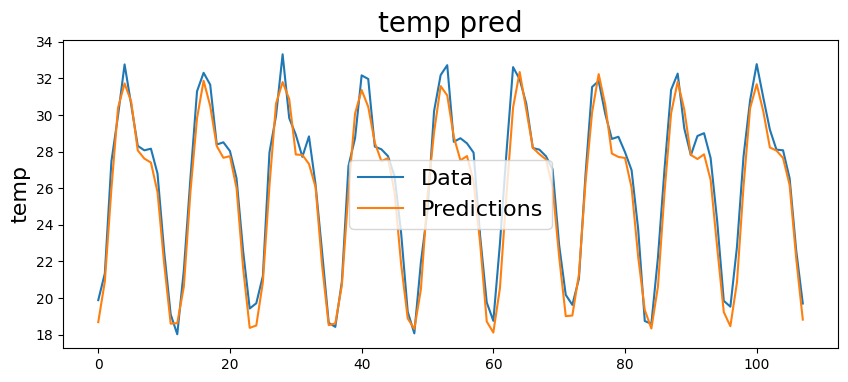

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# plt.plot(test_data[month])
# plt.plot(predictions)
plt.plot(y_test)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('temp pred', fontsize=20)
plt.ylabel('temp', fontsize=16)